In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_csv(r"C:\Users\315ra\OneDrive\Desktop\internship\car price\dump\Used_Cars_data.csv") #Reading csv file
df.head()

,Unnamed: 0,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs
0,0,-,-,-,-,-,-,-,-,-,-,-
1,1,-,-,-,-,-,-,-,-,-,-,-
2,2,Hyundai Verna 1.6 SX VTVT,Ahmedabad,2012,Petrol,5,"42,986",Third Owner,1591,Manual,17.01,3
3,3,Hyundai Venue SX iMT,Ahmedabad,2021,Petrol,5,"12,302",First Owner,998,Manual,18,11
4,4,Hyundai Xcent 1.2 Kappa S,Ahmedabad,2015,Petrol,5,"49,190",First Owner,1197,Manual,19.1,4.5


first two rows are entirely empty  lets drop these rows

In [4]:
df=df[2:]
df.head()

,Unnamed: 0,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs
2,2,Hyundai Verna 1.6 SX VTVT,Ahmedabad,2012,Petrol,5,"42,986",Third Owner,1591,Manual,17.01,3
3,3,Hyundai Venue SX iMT,Ahmedabad,2021,Petrol,5,"12,302",First Owner,998,Manual,18,11
4,4,Hyundai Xcent 1.2 Kappa S,Ahmedabad,2015,Petrol,5,"49,190",First Owner,1197,Manual,19.1,4.5
5,5,Maruti Ciaz VDi Plus SHVS,Ahmedabad,2016,Diesel,5,"1,10,000",First Owner,1248,Manual,28.09,5.2
6,6,Hyundai i20 Petrol Spotz,Ahmedabad,2018,Petrol,5,"52,000",First Owner,1197,Manual,18.6,6.5


Since Unnamed: 0 is an index column so let's drop it here itself.

In [5]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

# Features Information:

- Car_Name : Name of the car with Year
- City : Name of the particular city

- Manuf_yr  :  year of the car manufavtured 

- Fuel_type : Type of fuel used for car engine
- Kms_driven : Car running in kms till the date

- ownerships  : Number of pwnership passed till date
- Displacement_in_CC : Engine displacement/engine CC


- Transmission : Type of gear transmission used in car


- Mileage : Overall milage of car in Km/ltr


- seat_nos : Availability of number of seats in the car

- Car_price : Price of the car




In [6]:
#Checking shape of the dataset
df.shape

(11281, 11)

My dataset has 11281 rows and 11 columns.

In [7]:
#Checking all column names
df.columns

Index(['Car_name', 'city', 'Manuf_yr', 'fuel_type', 'seat_nos', 'Kms_driven',
       'ownerships', 'Displacement_in_CC', 'Transmission', 'Mileage',
       'price_in_lakhs'],
      dtype='object')

Above are the list of column names in the dataset.

# Since i have to predict the used car price and the Car_Price column is a continuous data so it's a Regression problem.

In [8]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [9]:
#Checking for missing values
df.isnull().sum()

Car_name               74
city                   74
Manuf_yr               86
fuel_type              74
seat_nos               82
Kms_driven             74
ownerships             75
Displacement_in_CC     86
Transmission           74
Mileage               338
price_in_lakhs         74
dtype: int64

We can observe multiple rows with null values in the dataset 

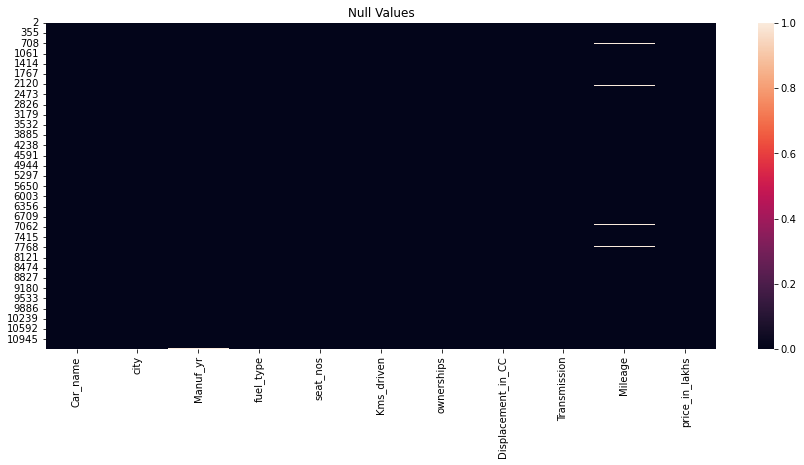

In [10]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [11]:
df.price_in_lakhs.head()

2      3
3     11
4    4.5
5    5.2
6    6.5
Name: price_in_lakhs, dtype: object

In [12]:
(df.price_in_lakhs).head()

2      3
3     11
4    4.5
5    5.2
6    6.5
Name: price_in_lakhs, dtype: object

In [13]:
#We can observe most of the rows are null value lets drop those rows 

In [14]:
df.dropna(how='all', axis=0,inplace=True)

In [15]:
#Checking for missing values
df.isnull().sum()

Car_name                0
city                    0
Manuf_yr               12
fuel_type               0
seat_nos                8
Kms_driven              0
ownerships              1
Displacement_in_CC     12
Transmission            0
Mileage               264
price_in_lakhs          0
dtype: int64

In [16]:
#Replacing nan values
for col in ['Manuf_yr','Mileage','Displacement_in_CC']:
    df[col] = df[col].fillna(df[col].median())


In [17]:
for col1 in ['seat_nos','ownerships']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [18]:
#Checking for missing values
df.isnull().sum()

Car_name              0
city                  0
Manuf_yr              0
fuel_type             0
seat_nos              0
Kms_driven            0
ownerships            0
Displacement_in_CC    0
Transmission          0
Mileage               0
price_in_lakhs        0
dtype: int64

In [19]:
#Checking description of data set
df.describe()

,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs
count,11207,11207,11207,11207,11207,11207,11207,11207,11207,11207,11207
unique,2594,26,23,5,9,7224,5,148,2,513,1497
top,Maruti Wagon R VXI BS IV,Ahmedabad,2017,Petrol,5,"80,000",First Owner,1197,Manual,18.9,3.5
freq,137,1228,1249,6701,9706,169,7913,1966,8450,422,246


In [20]:
df['price_in_lakhs'] = df['price_in_lakhs'].str.replace(',','')

In [21]:
df['Kms_driven'] = df['Kms_driven'].str.replace(',','')

In [22]:
df.Manuf_yr = df.Manuf_yr.astype('int')

In [23]:

df.Displacement_in_CC = df.Displacement_in_CC.astype('int')
df.Mileage = df.Mileage.astype('float')
df.price_in_lakhs = df.price_in_lakhs.astype('float')


In [24]:
df.seat_nos = df.seat_nos.astype('int')

In [25]:
price_in_lakh=[]
for i in df.price_in_lakhs:
    if i>1000:
        
        price_in_lakh.append(i/100000)
    else :
        price_in_lakh.append(i)
        

In [26]:
df['price_in_lakhs']=price_in_lakh 

df['price_in_lakhs']=round(df['price_in_lakhs'],2)

In [27]:
Brand=[]
for i in df['Car_name']:
    Brand.append(i.split()[0])
    
df['Brand']=Brand
df['Brand'].replace('Land','Land Rover',inplace=True)
df['Brand'].replace('Mini','Mini Cooper',inplace=True)

    

In [28]:
df.Kms_driven = df.Kms_driven.astype('int')

In [29]:
categorical_columns=['Car_name', 'city', 'fuel_type', 'ownerships', 'Transmission', 'Brand','seat_nos']

In [30]:
numerical_columns=['Manuf_yr', 'Kms_driven', 'Displacement_in_CC', 'Mileage', 'price_in_lakhs']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11207 entries, 2 to 11282
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_name            11207 non-null  object 
 1   city                11207 non-null  object 
 2   Manuf_yr            11207 non-null  int32  
 3   fuel_type           11207 non-null  object 
 4   seat_nos            11207 non-null  int32  
 5   Kms_driven          11207 non-null  int32  
 6   ownerships          11207 non-null  object 
 7   Displacement_in_CC  11207 non-null  int32  
 8   Transmission        11207 non-null  object 
 9   Mileage             11207 non-null  float64
 10  price_in_lakhs      11207 non-null  float64
 11  Brand               11207 non-null  object 
dtypes: float64(2), int32(4), object(6)
memory usage: 963.1+ KB


In [32]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Maruti Wagon R VXI BS IV                                   137
Maruti Alto 800 LXI                                        132
Maruti Swift VXI                                           122
Maruti Baleno 1.2 Delta                                     85
Hyundai Grand i10 Sportz                                    75
Maruti Swift Dzire VDI                                      67
Maruti Swift Dzire VXI                                      65
Hyundai i10 Magna                                           61
Hyundai EON Era Plus                                        57
Maruti Wagon R LXI BS IV                                    55
Maruti Alto K10 VXI                                         53
Hyundai Grand i10 1.2 Kappa Sportz BSIV                     53
Hyundai i20 Sportz 1.2                                      51
Maruti Swift VDI                                            49
Honda City 1.5 S MT                                         45
Maruti Swift VDI BSIV                                  

3.50     246
4.50     243
3.00     242
2.50     232
4.00     229
5.00     218
2.00     200
6.00     186
5.50     178
6.50     154
7.00     149
8.00     116
7.50     114
1.50     113
1.00      91
5.25      86
8.50      83
9.00      74
1.80      72
10.00     70
3.25      68
9.50      67
4.25      64
2.20      60
3.75      60
6.75      57
4.75      56
2.25      56
2.80      54
5.75      53
1.20      52
2.30      52
12.00     51
3.20      50
2.75      48
2.70      48
1.60      48
3.80      48
10.50     47
6.25      47
11.00     46
2.60      44
4.20      44
1.40      44
14.00     44
1.90      43
5.20      42
1.25      41
1.30      41
2.40      39
3.10      38
2.90      38
3.70      38
3.40      37
3.30      36
1.70      36
1.75      36
3.60      36
1.10      36
16.00     35
4.80      35
5.45      35
4.70      35
18.00     34
7.25      33
2.10      33
13.00     32
3.90      32
15.00     32
4.10      31
5.80      29
12.50     29
0.80      29
4.90      29
9.75      29
2.95      28
8.25      27

# Visualization:

In [33]:
df.head()

,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs,Brand
2,Hyundai Verna 1.6 SX VTVT,Ahmedabad,2012,Petrol,5,42986,Third Owner,1591,Manual,17.01,3.0,Hyundai
3,Hyundai Venue SX iMT,Ahmedabad,2021,Petrol,5,12302,First Owner,998,Manual,18.00,11.0,Hyundai
4,Hyundai Xcent 1.2 Kappa S,Ahmedabad,2015,Petrol,5,49190,First Owner,1197,Manual,19.10,4.5,Hyundai
5,Maruti Ciaz VDi Plus SHVS,Ahmedabad,2016,Diesel,5,110000,First Owner,1248,Manual,28.09,5.2,Maruti
6,Hyundai i20 Petrol Spotz,Ahmedabad,2018,Petrol,5,52000,First Owner,1197,Manual,18.60,6.5,Hyundai


In [34]:
data=df

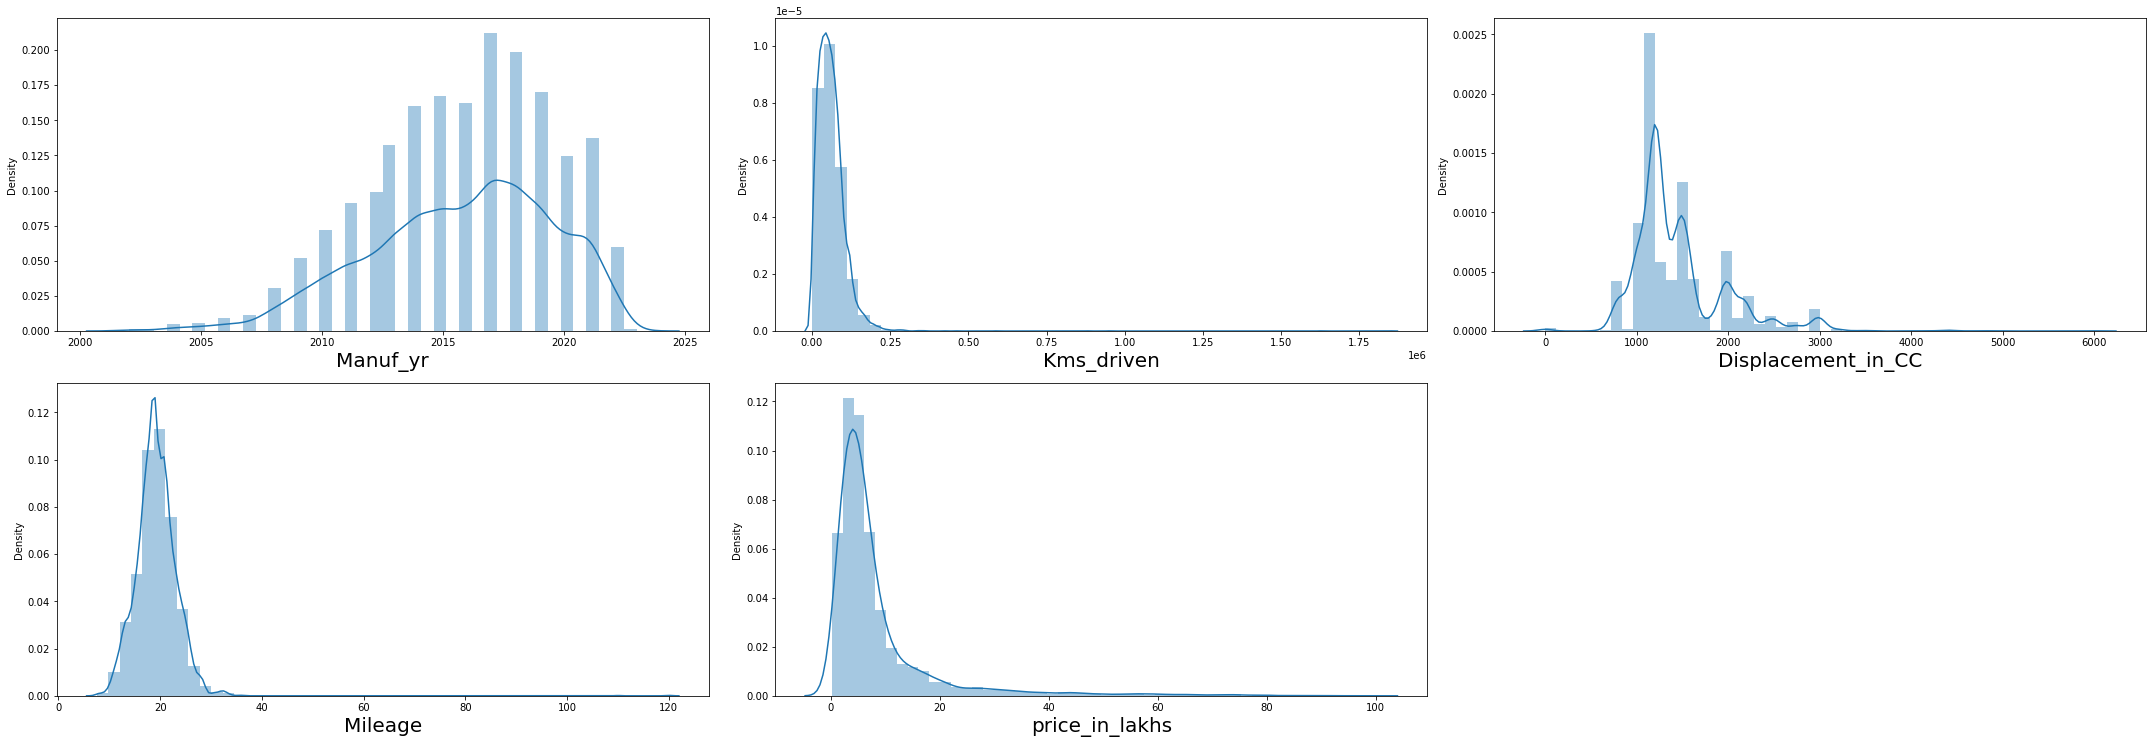

In [35]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

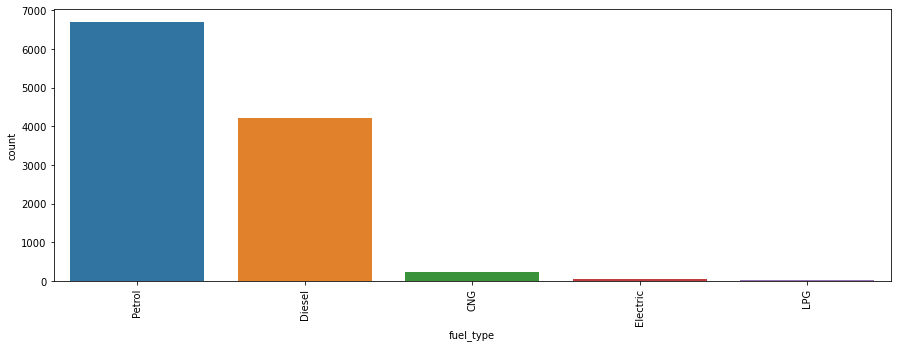

In [36]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['fuel_type'])
plt.xticks(rotation=90);

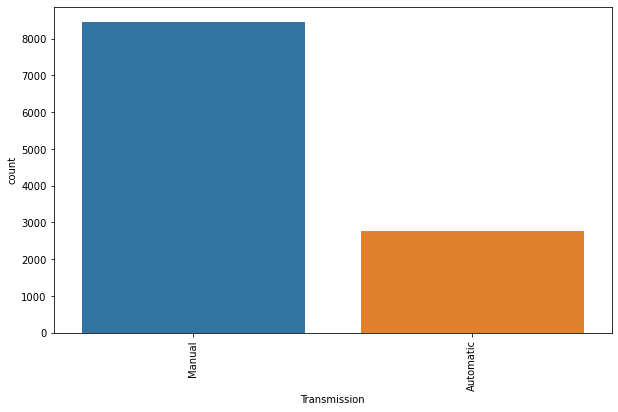

In [37]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Transmission'])
plt.xticks(rotation=90);

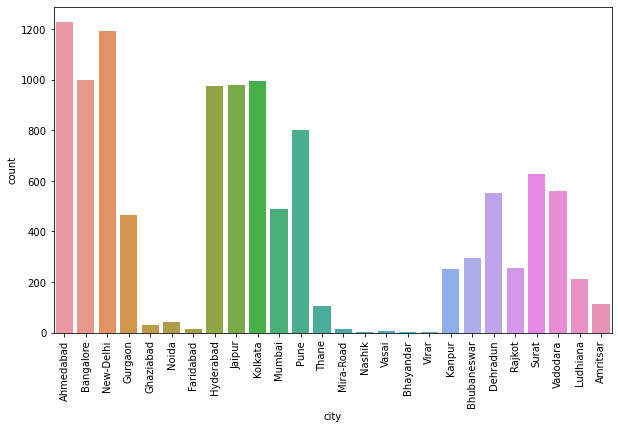

In [38]:
#Count plot for diff locations

plt.figure(figsize=[10,6])
sns.countplot(df['city'])
plt.xticks(rotation=90);

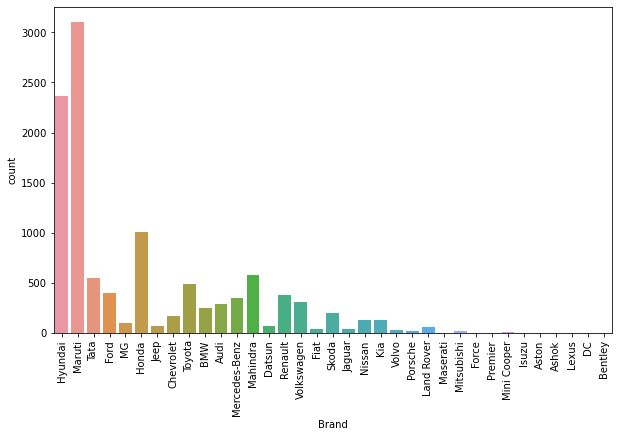

In [39]:
#Count plot for Car_Brand Name
plt.figure(figsize=[10,6])
sns.countplot(df['Brand'])
plt.xticks(rotation=90);

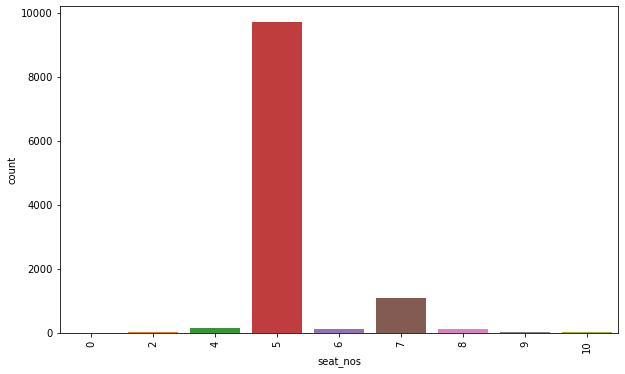

In [40]:
#Count plot for seat_nos 
plt.figure(figsize=[10,6])
sns.countplot(df['seat_nos'])
plt.xticks(rotation=90);

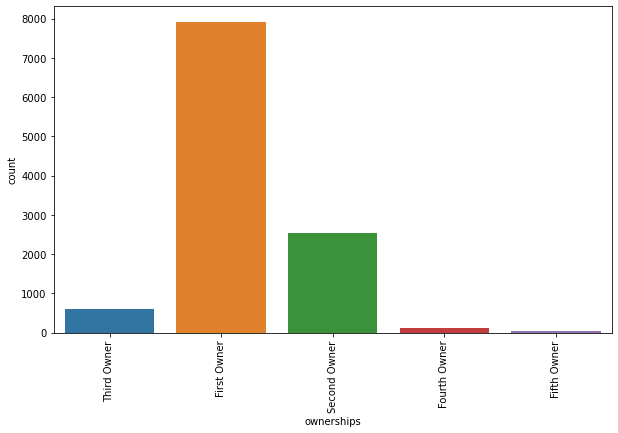

In [41]:
#Count plot for ownerships 
plt.figure(figsize=[10,6])
sns.countplot(df['ownerships'])
plt.xticks(rotation=90);

# Bivariate Analysis:

In [42]:
col=['Manuf_yr','Kms_driven','Displacement_in_CC', 'Mileage' ]

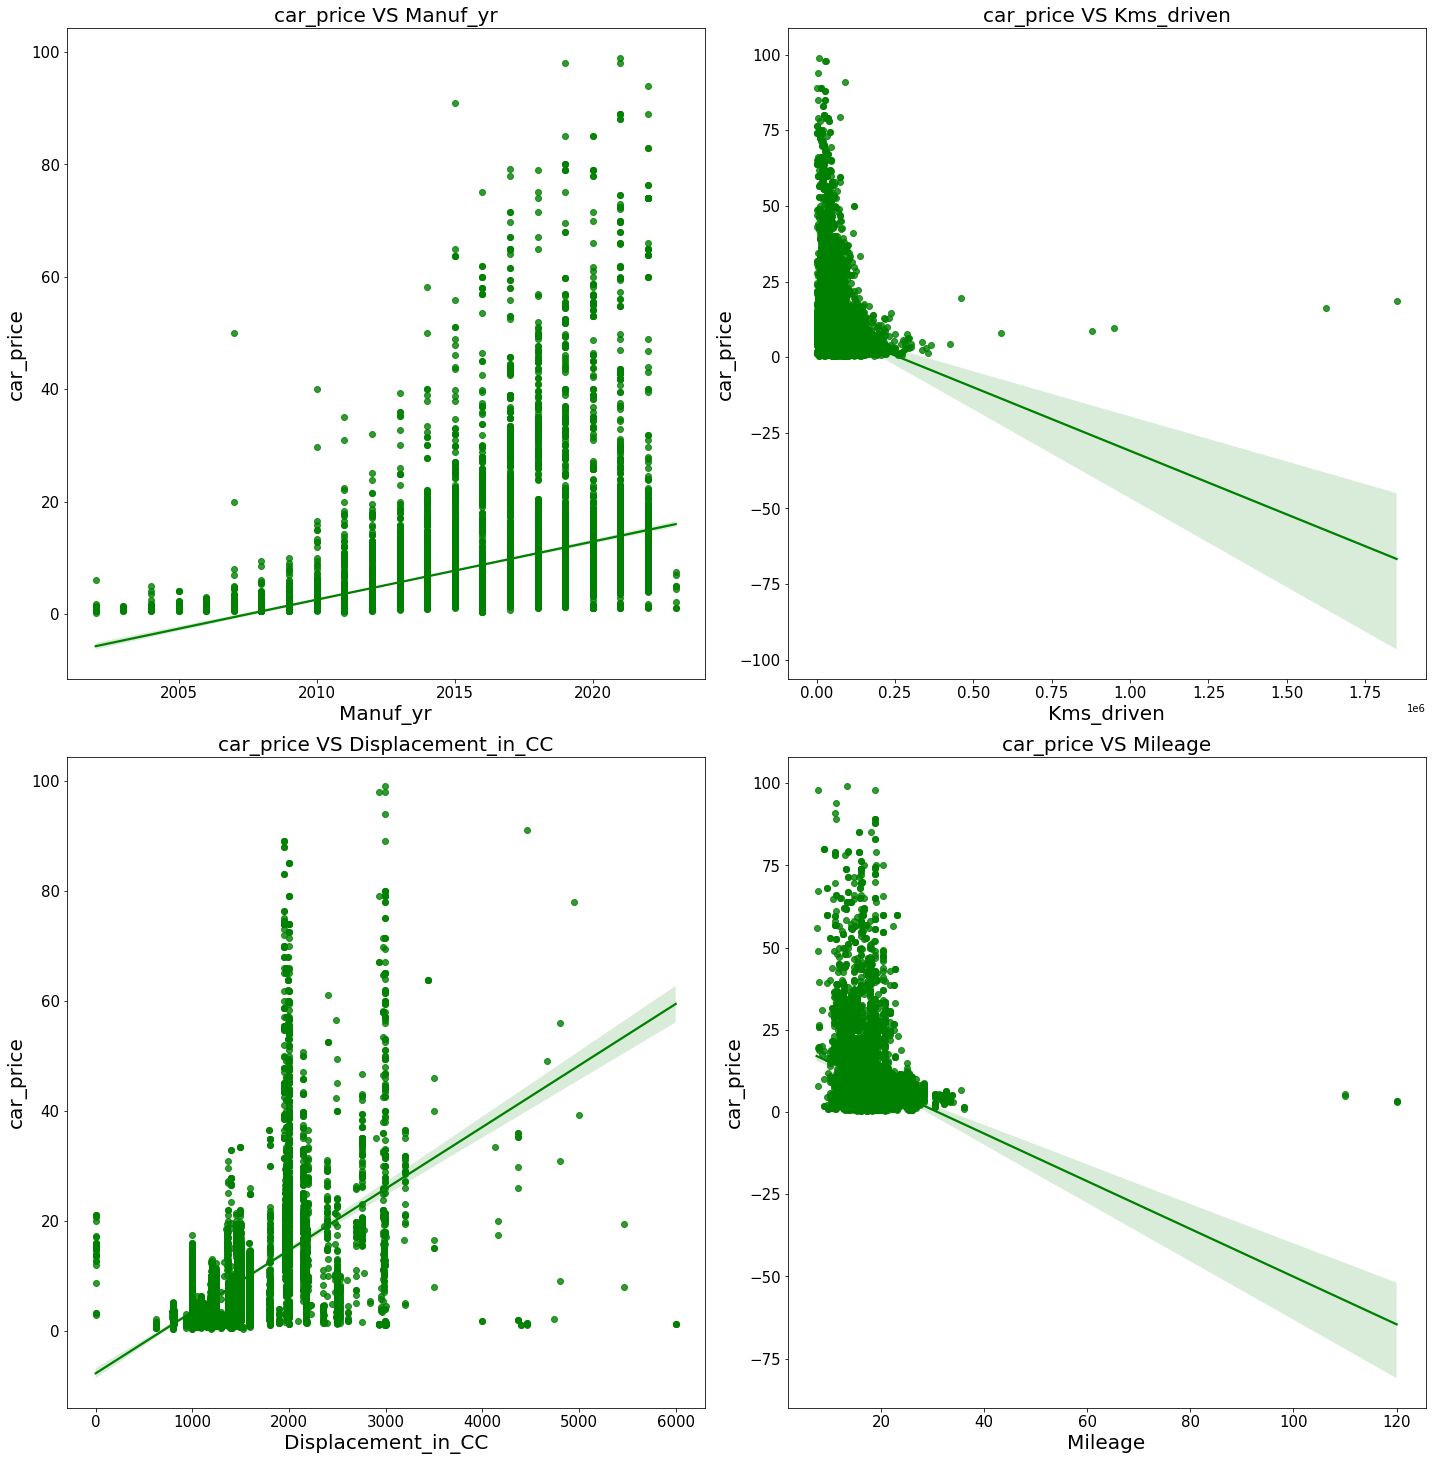

In [43]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['price_in_lakhs'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

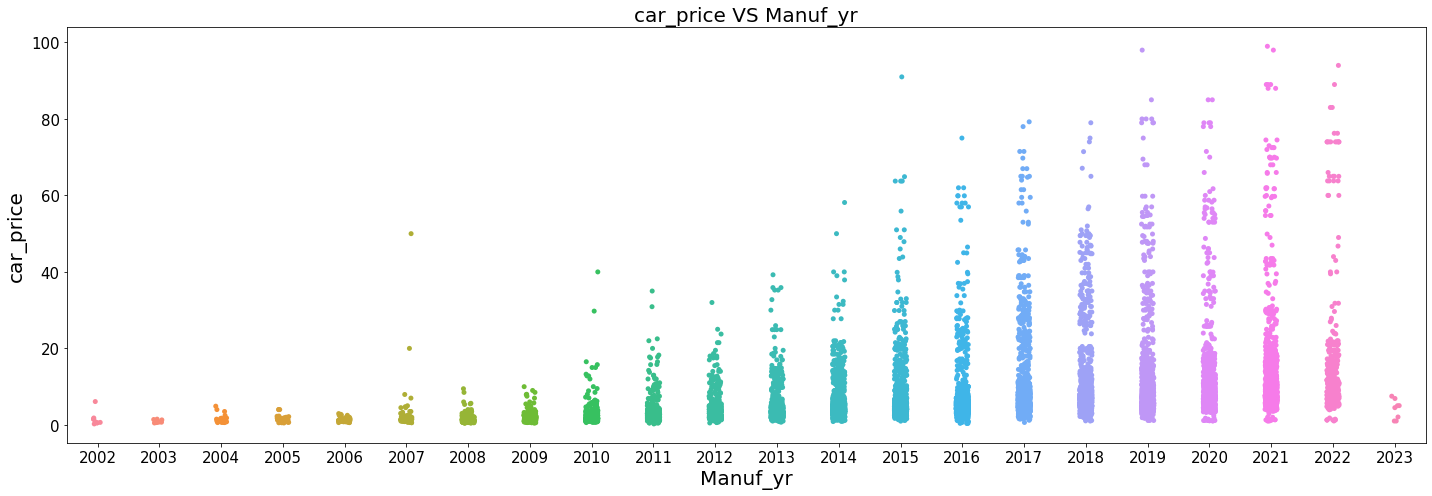

In [44]:
#stripplot for Manuf_yr columns
plt.figure(figsize=(20,7))


sns.stripplot(x=df['Manuf_yr'] , y=df['price_in_lakhs'])
plt.title("car_price VS Manuf_yr",fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.xlabel('Manuf_yr',fontsize = 20)
plt.ylabel('car_price',fontsize = 20)
plt.tight_layout()

In [45]:
col2=['Brand','fuel_type','Transmission', 'seat_nos', 'Brand', 'city','Car_name','ownerships']

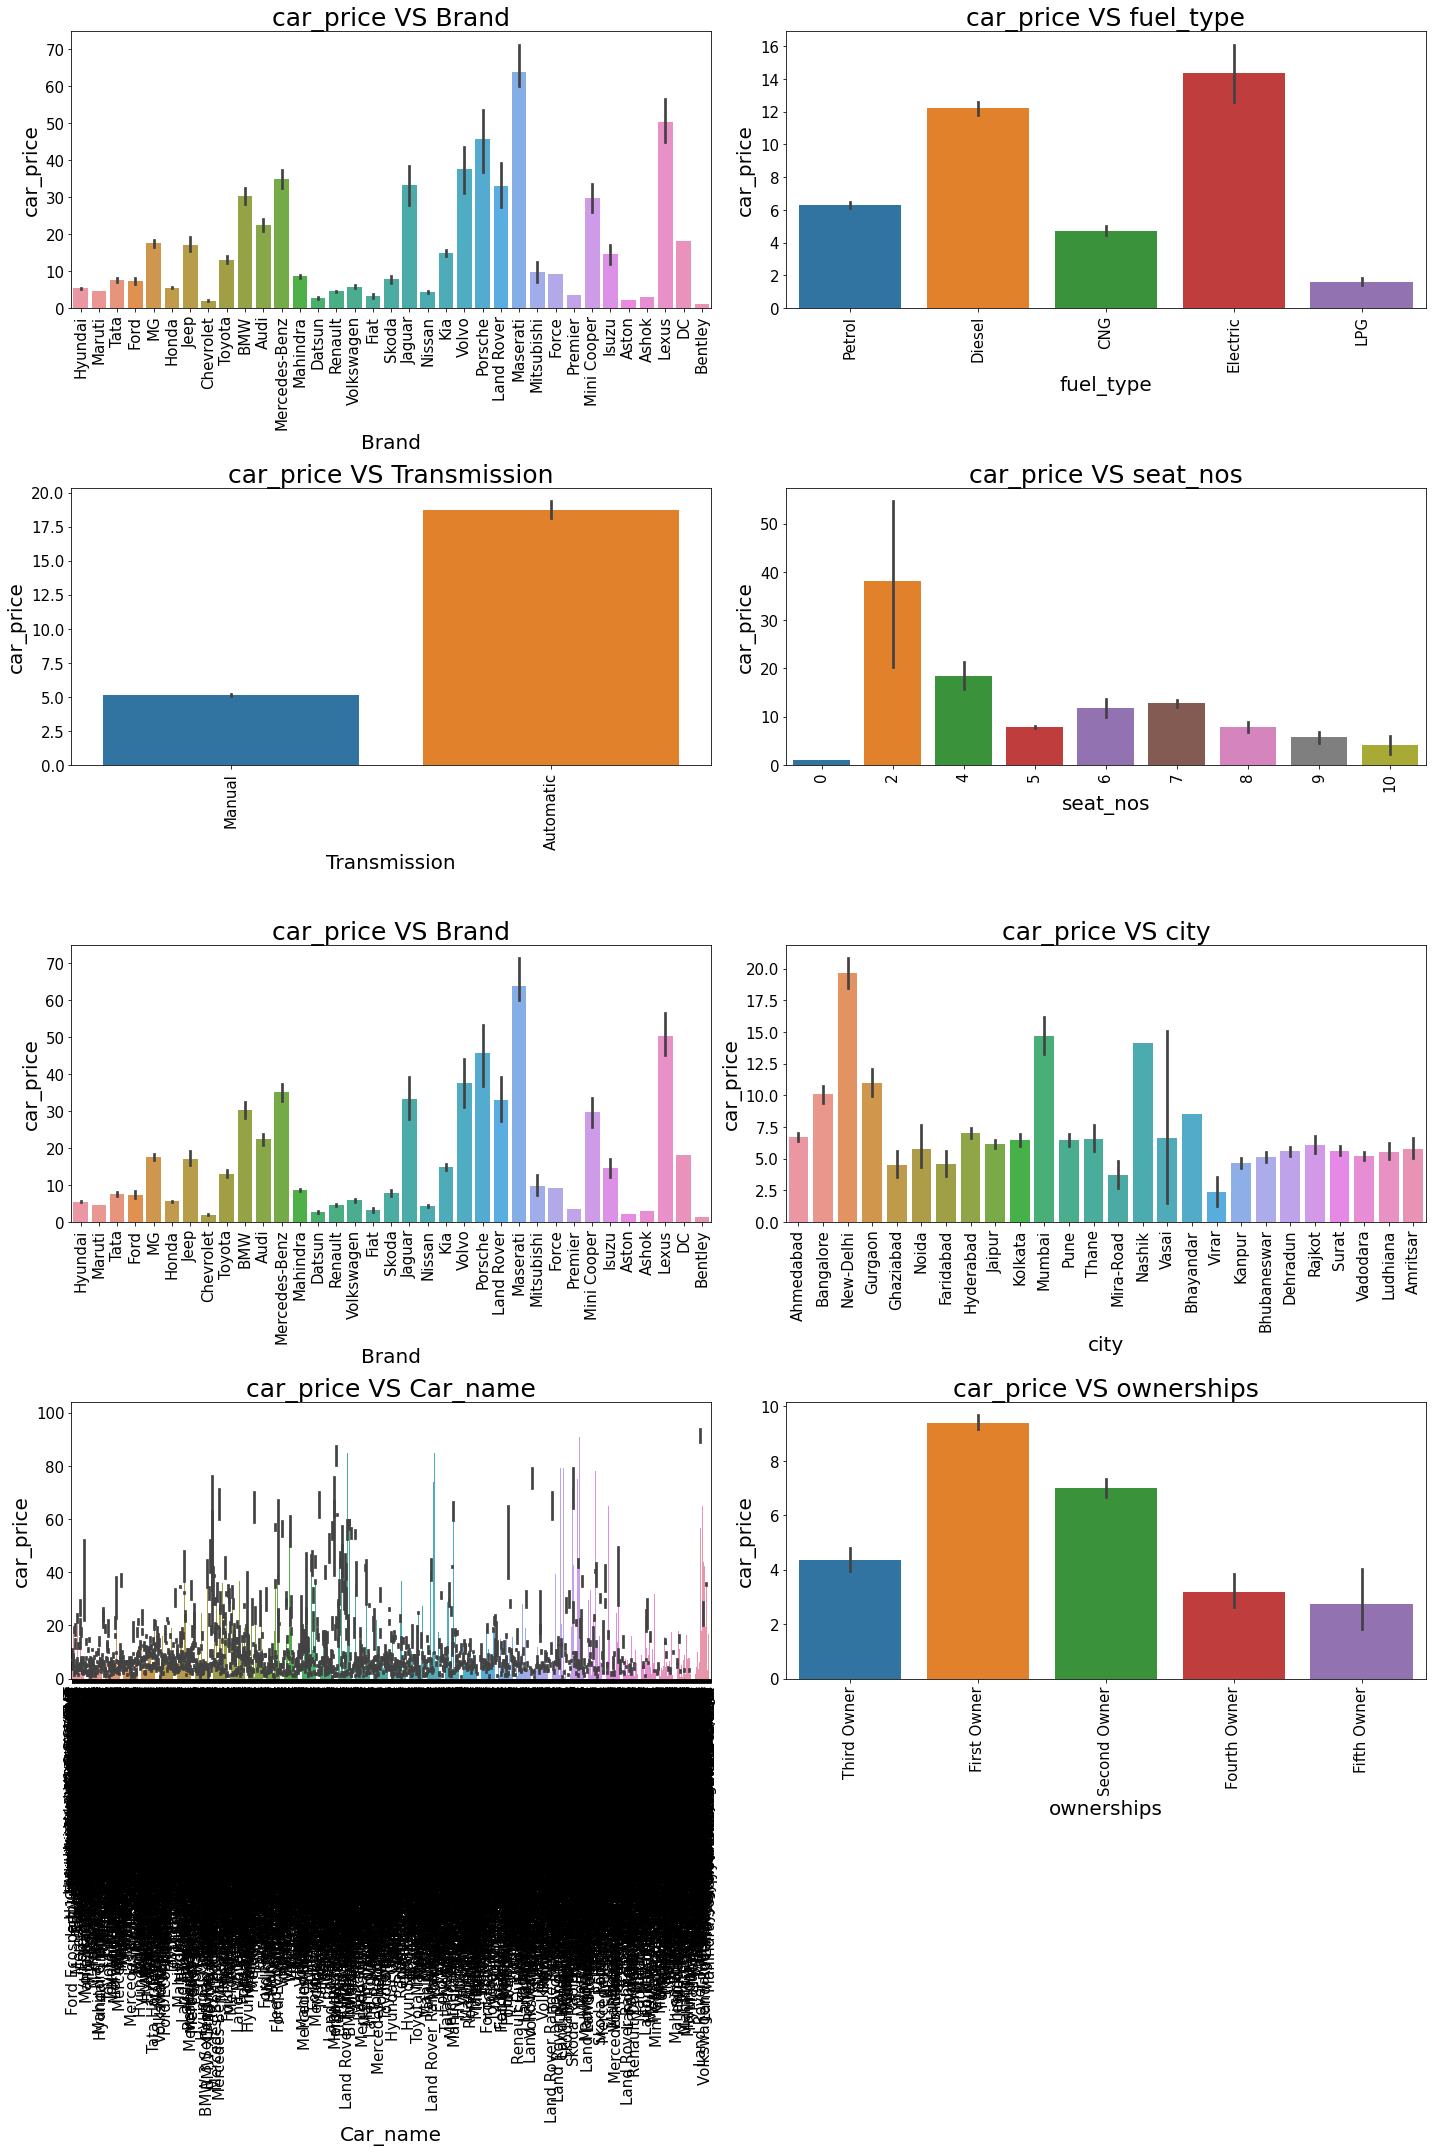

In [46]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(4,2,i+1)
    sns.barplot(y=df['price_in_lakhs'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

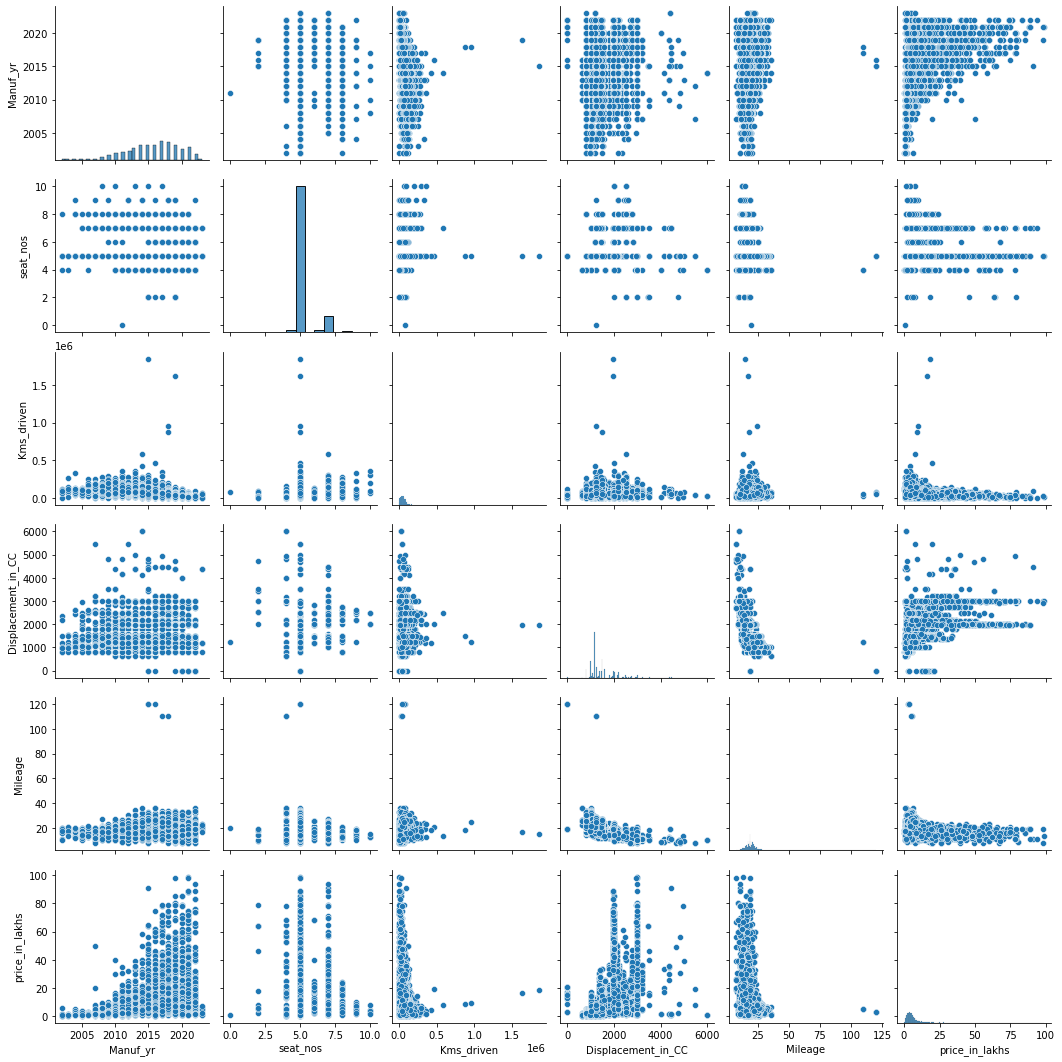

In [47]:
#pair ploting for df
sns.pairplot(df)

By looking into the pair plot of pair of features we can notice some amount of outliers in each plot so we have to deal with this.

# Checking for outliers:

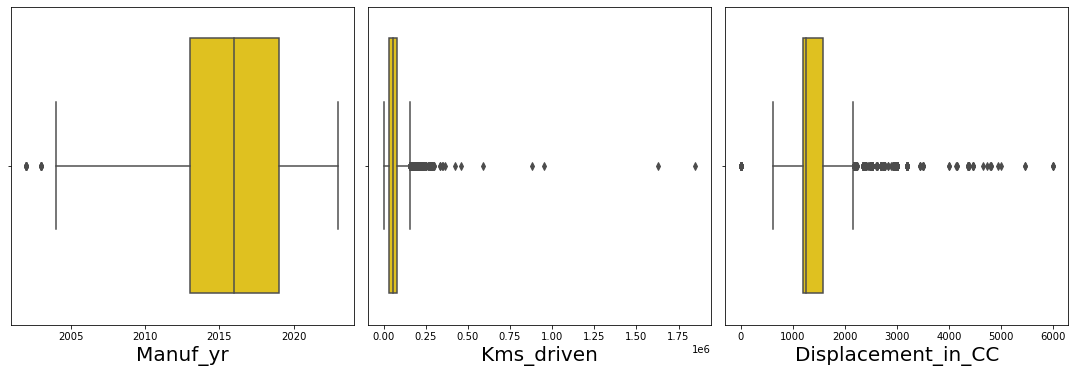

In [48]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns[:3]:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers:

# i) Zscore method:

In [49]:
#Features having outliers 
features=df[['Manuf_yr', 'Displacement_in_CC', 'Mileage']]

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs,Brand
2,Hyundai Verna 1.6 SX VTVT,Ahmedabad,2012,Petrol,5,42986,Third Owner,1591,Manual,17.01,3.0,Hyundai
3,Hyundai Venue SX iMT,Ahmedabad,2021,Petrol,5,12302,First Owner,998,Manual,18.00,11.0,Hyundai
4,Hyundai Xcent 1.2 Kappa S,Ahmedabad,2015,Petrol,5,49190,First Owner,1197,Manual,19.10,4.5,Hyundai
5,Maruti Ciaz VDi Plus SHVS,Ahmedabad,2016,Diesel,5,110000,First Owner,1248,Manual,28.09,5.2,Maruti
6,Hyundai i20 Petrol Spotz,Ahmedabad,2018,Petrol,5,52000,First Owner,1197,Manual,18.60,6.5,Hyundai


In [51]:
#Checking shape of new dataset
df_new.shape[0]

10948

In [52]:
#Checking shape of old dataset
df.shape[0]

11207

In [53]:
#Checking dataloss in zscore method
Dataloss = (((df.shape[0])-(df_new.shape[0]))/(df.shape[0])*100)
Dataloss

2.31105559025609

In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [54]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
#Checking dataloss in zscore method
Dataloss = (((df.shape[0])-(df_1.shape[0]))/(df.shape[0])*100)
Dataloss

12.099580619255821

In IQR method the data loss is more than 10% 

We will consider the Zscore method

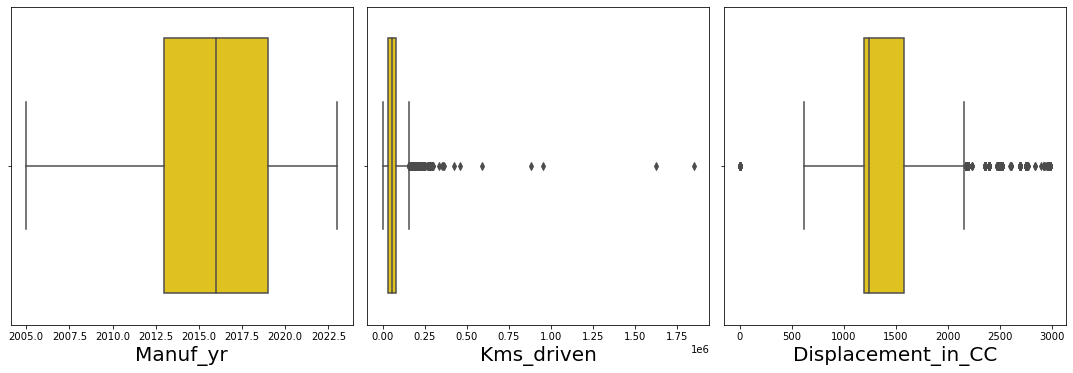

In [57]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns[:3]:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_new[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [58]:
df=df_new

# Encoding

In [59]:
cat_col=['Car_name', 'city', 'fuel_type', 'ownerships', 'Transmission', 'Brand']

In [60]:
#Encoding the columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)
df.head(10)

,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs,Brand
2,729,0,2012,4,5,42986,4,1591,1,17.01,3.0,10
3,712,0,2021,4,5,12302,1,998,1,18.00,11.0,10
4,783,0,2015,4,5,49190,1,1197,1,19.10,4.5,10
5,1374,0,2016,1,5,110000,1,1248,1,28.09,5.2,19
6,882,0,2018,4,5,52000,1,1197,1,18.60,6.5,10
7,787,0,2018,4,5,82000,1,1197,1,20.14,5.9,10
8,2064,0,2018,1,7,58000,1,2179,1,17.60,8.9,29
9,234,0,2018,1,5,72000,1,1498,1,23.00,8.9,8
10,1029,0,2021,4,5,13000,1,1451,0,18.90,17.9,17
11,868,0,2016,4,5,53241,3,1197,1,18.60,5.5,10


# Separating Features and Target:

In [61]:
#initialising X and y
X=df.drop(['price_in_lakhs'],axis=1)
y=df['price_in_lakhs']

# Checking for skewness:

In [62]:
#Checking for skewness
X.skew()

Car_name              0.117095
city                 -0.010680
Manuf_yr             -0.396008
fuel_type            -0.459652
seat_nos              2.464137
Kms_driven            9.897023
ownerships            1.116055
Displacement_in_CC    1.187357
Transmission         -1.242274
Mileage               0.137975
Brand                 0.184107
dtype: float64

In [ ]:
#We can observe skewness in Kms_driven,Displacement_in_CC,Mileage and we can ignore the skewness in categorical columns.

In [ ]:
#Lets remove the skewness

In [63]:
#Creating a list of skewed features
fea=['Kms_driven', 'Displacement_in_CC']

In [64]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [65]:
X[fea] = scaler.fit_transform(X[fea].values)

In [66]:
#Checking skewness again
X[fea].skew()

Kms_driven            0.089269
Displacement_in_CC    0.364076
dtype: float64

In all the columns skewness has reduced 

# Checking correlation using heat map:

In [67]:
cor=df_new.corr()
cor

,Car_name,city,Manuf_yr,fuel_type,seat_nos,Kms_driven,ownerships,Displacement_in_CC,Transmission,Mileage,price_in_lakhs,Brand
Car_name,1.000000,0.018961,0.067182,-0.080988,0.159608,0.038352,-0.024251,0.048112,0.031570,0.002757,0.013172,0.976902
city,0.018961,1.000000,-0.082949,-0.053320,0.022846,0.040483,0.030570,0.065234,-0.042875,-0.040684,0.055253,0.012990
Manuf_yr,0.067182,-0.082949,1.000000,0.026930,0.007402,-0.430317,-0.354384,-0.006285,-0.220281,0.131147,0.389524,0.092492
fuel_type,-0.080988,-0.053320,0.026930,1.000000,-0.299677,-0.270037,-0.077693,-0.499892,0.103369,-0.136321,-0.250244,-0.082696
seat_nos,0.159608,0.022846,0.007402,-0.299677,1.000000,0.131529,0.024759,0.472410,-0.001843,-0.336349,0.102060,0.186958
Kms_driven,0.038352,0.040483,-0.430317,-0.270037,0.131529,1.000000,0.203416,0.137795,0.144073,-0.012864,-0.192261,0.035364
ownerships,-0.024251,0.030570,-0.354384,-0.077693,0.024759,0.203416,1.000000,0.063950,0.042583,-0.065771,-0.137344,-0.031480
Displacement_in_CC,0.048112,0.065234,-0.006285,-0.499892,0.472410,0.137795,0.063950,1.000000,-0.394600,-0.581869,0.536847,0.054609
Transmission,0.031570,-0.042875,-0.220281,0.103369,-0.001843,0.144073,0.042583,-0.394600,1.000000,0.317268,-0.548394,0.042401
Mileage,0.002757,-0.040684,0.131147,-0.136321,-0.336349,-0.012864,-0.065771,-0.581869,0.317268,1.000000,-0.312241,-0.006296


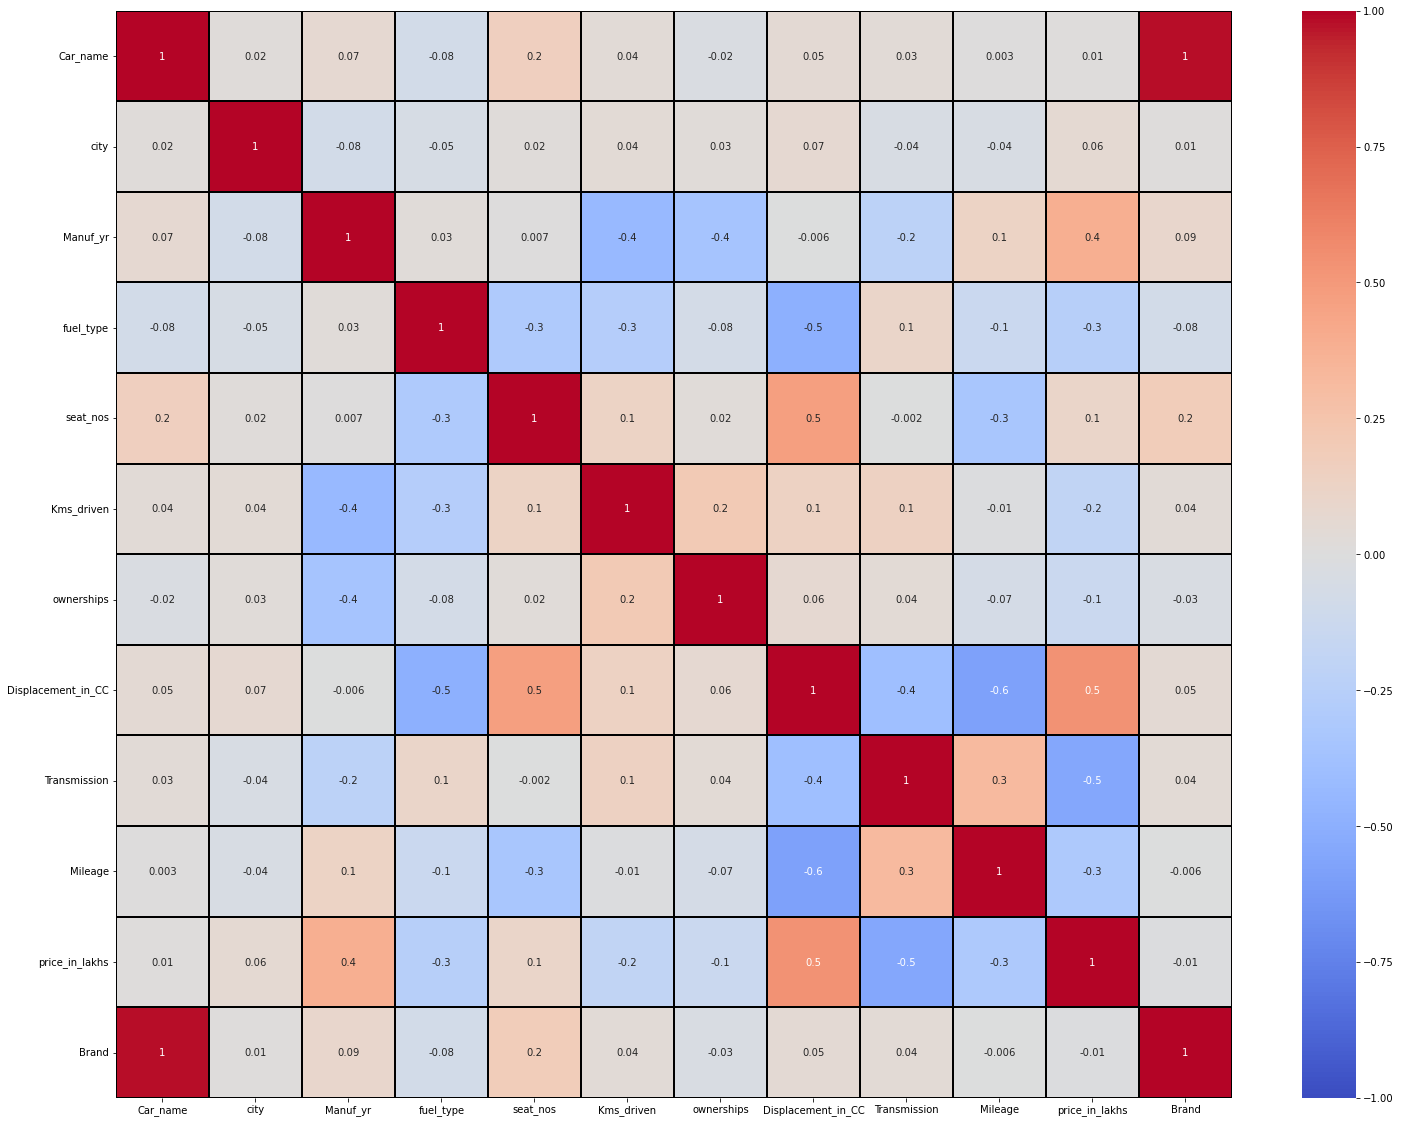

In [68]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

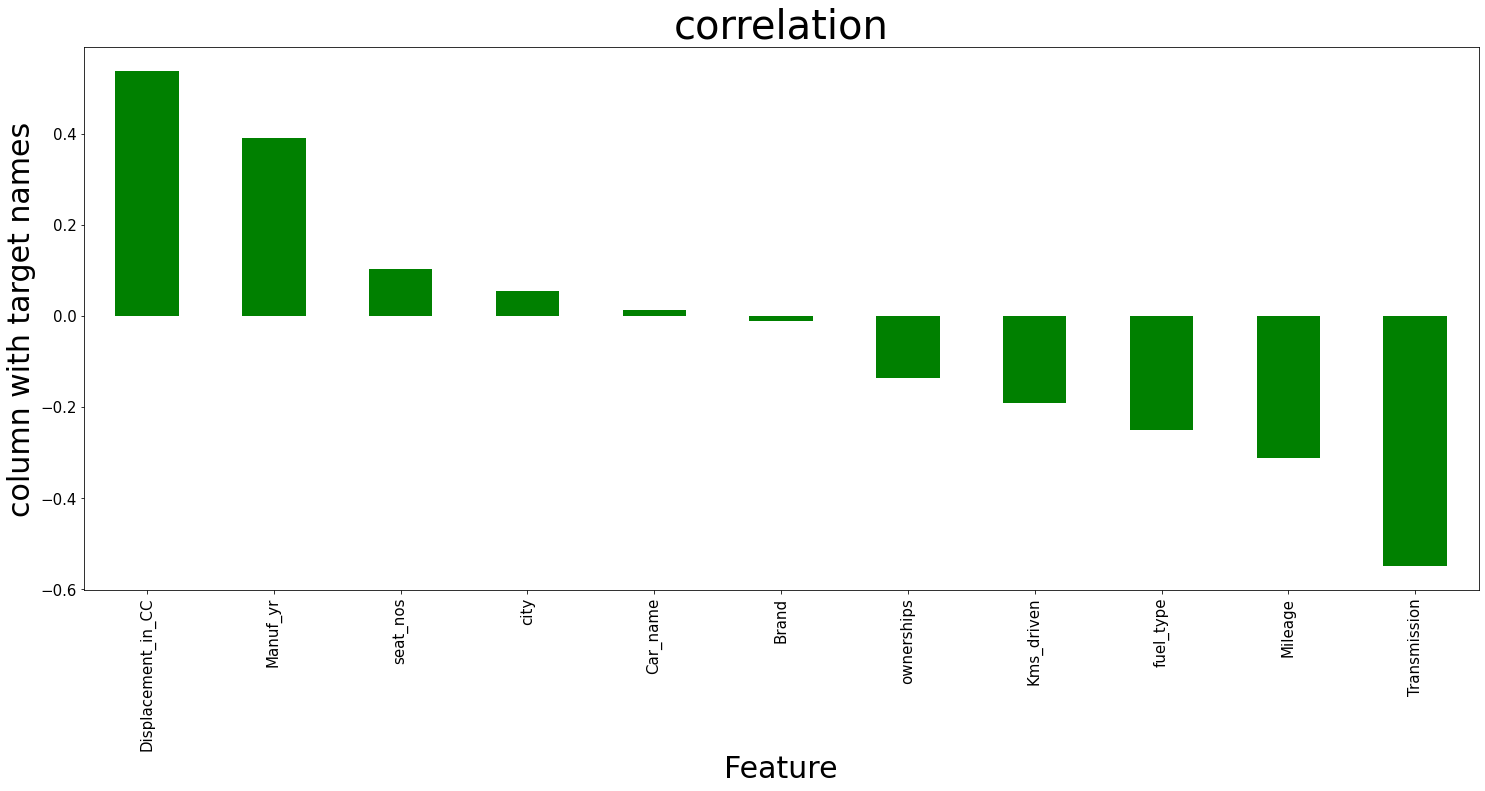

In [69]:
plt.figure(figsize=(25,10))
df_new.corr()['price_in_lakhs'].sort_values(ascending=False).drop(['price_in_lakhs']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

# Scaling the data using Standard scaler:

In [70]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

I have scaled my data using Standard scaler.

# Checking for multicolinearity issue using VIF:

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
1,1.014416,city
6,1.156291,ownerships
8,1.384402,Transmission
4,1.460894,seat_nos
5,1.738200,Kms_driven
2,1.826495,Manuf_yr
3,2.189191,fuel_type
9,2.497165,Mileage
7,2.970617,Displacement_in_CC
0,22.655439,Car_name


In [72]:
#Droping high VIF columns
X.drop(["Brand"],axis=1,inplace=True)

In [73]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
1,1.014260,city
0,1.040339,Car_name
6,1.156245,ownerships
8,1.374436,Transmission
4,1.441875,seat_nos
5,1.737017,Kms_driven
2,1.792486,Manuf_yr
3,2.188701,fuel_type
9,2.489710,Mileage
7,2.967615,Displacement_in_CC


No multicollinearity found in the dataset

# Model Building

In [74]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [75]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9550600922075698  on Random_state  177


In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [77]:
# different algorithm going to use

dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgbr=XGBRegressor()
etr=ExtraTreesRegressor()

In [78]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')
    
    
    
    score=cross_val_score(mod,X,y,scoring='r2',cv=5)
    print("\n",mod,"Cross val score is ",score)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")
    
    #difference between crossval score
    cros_val_dif=(r2_score(y_test,pred)*100)-(score.mean()*100)
    print("difference b/w accuracy and crossval score is",absolute(cros_val_dif))


AdaBoostRegressor()
r2_score for train data is 71.24%


r2_score for  test data is  72.22%


Error
mean absolute error :  2.9425130565931368
mean squared error :  29.45562465071421
mean squared error is:  5.427303626177018

 AdaBoostRegressor() Cross val score is  [0.68916246 0.24936528 0.65184113 0.67735693 0.74079508]
mean is  60.17041781045904 


difference b/w accuracy and crossval score is 12.04902606786527


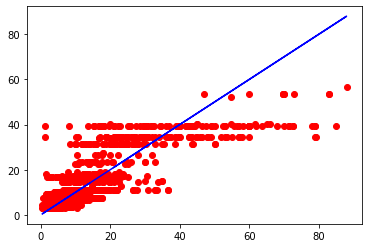

In [80]:
#calling AdaBoostRegressor model
eval(adr)

GradientBoostingRegressor()
r2_score for train data is 89.60%


r2_score for  test data is  88.19%


Error
mean absolute error :  1.6909663274544375
mean squared error :  12.522199094999957
mean squared error is:  3.5386719394428128

 GradientBoostingRegressor() Cross val score is  [0.85971646 0.82592866 0.8162221  0.86248214 0.89010786]
mean is  85.08914461841918 


difference b/w accuracy and crossval score is 3.1007627812526977


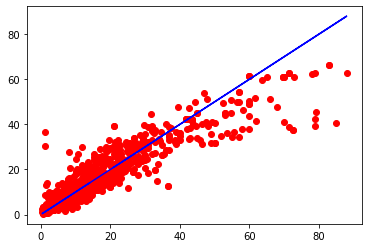

In [81]:
#calling GradientBoostingRegressor model
eval(gbr)

ExtraTreesRegressor()
r2_score for train data is 100.00%


r2_score for  test data is  94.53%


Error
mean absolute error :  1.0731404718417055
mean squared error :  5.804211470447067
mean squared error is:  2.409193116055055

 ExtraTreesRegressor() Cross val score is  [0.91432096 0.89665965 0.90863689 0.94928563 0.94965632]
mean is  92.37118908870679 


difference b/w accuracy and crossval score is 2.154670593141148


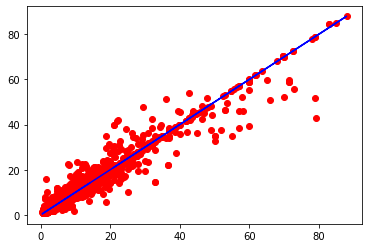

In [87]:
#calling ExtraTreesRegressor model
eval(etr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score for train data is 99.37%


r2_score for  test data is  96.08%


Error
mean absolute error :  0.9910865602792218
mean squared error :  4.156682288976304
mean squared error is:  2.03879432238181

 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_

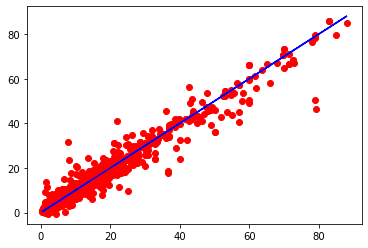

In [89]:
#calling XGBRegressor model
eval(xgbr)

DecisionTreeRegressor()
r2_score for train data is 100.00%


r2_score for  test data is  88.88%


Error
mean absolute error :  1.3486306443429732
mean squared error :  11.786524460510737
mean squared error is:  3.4331508065493916

 DecisionTreeRegressor() Cross val score is  [0.82940767 0.87733358 0.77853136 0.89604632 0.92485817]
mean is  86.1235420478738 


difference b/w accuracy and crossval score is 2.7602039891744283


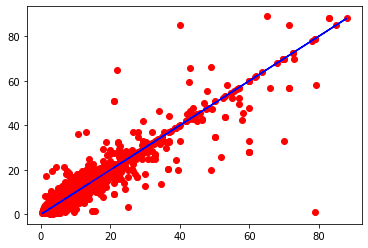

In [91]:
#calling DecisionTreeRegressor model
eval(dtr)

KNeighborsRegressor()
r2_score for train data is 88.43%


r2_score for  test data is  83.04%


Error
mean absolute error :  1.9086581430745813
mean squared error :  17.978684416438355
mean squared error is:  4.240127877368601

 KNeighborsRegressor() Cross val score is  [0.78549507 0.76775581 0.76695523 0.83654417 0.85127129]
mean is  80.16043133726957 


difference b/w accuracy and crossval score is 2.8832875671043894


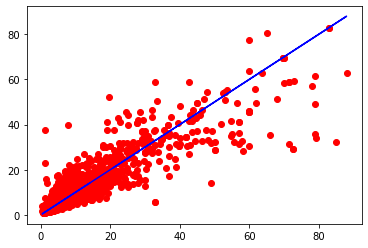

In [84]:
#calling KNeighborsRegressor model
eval(knn)

RandomForestRegressor()
r2_score for train data is 98.89%


r2_score for  test data is  95.19%


Error
mean absolute error :  1.072961601942451
mean squared error :  5.100166386661839
mean squared error is:  2.2583547964529043

 RandomForestRegressor() Cross val score is  [0.91825538 0.90382843 0.90538572 0.94232147 0.95088591]
mean is  92.41353836842426 


difference b/w accuracy and crossval score is 2.776329094423531


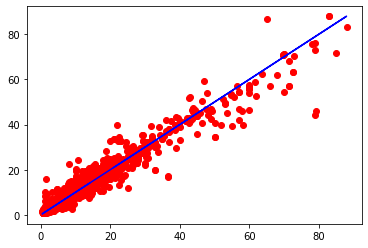

In [86]:
# RandomForestRegressor model
eval(rfr)

# After checking the least difference between the test accuracy and cross validation score the ExtraTreesRegressor model is the best model with the least difference of 2.15 and the test accuracy of 94.53% and cross validation score of 92.37%

In [ ]:
difference b/w accuracy and crossval score is 4.566053301200796

In [96]:
etr.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100,150,200,300],
          'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
          'max_depth': [1,3, 5, 7],
          'min_samples_split': [1, 3, 5,7],
          'max_features' : ['sqrt', 'log2', 'None']
           }

               

In [101]:
#importing gridsearch
from sklearn.model_selection import GridSearchCV

Grid_sear= GridSearchCV(estimator=ExtraTreesRegressor(),param_grid=params,cv= 5,n_jobs=-1)

In [102]:
#training the model with paramters
Grid_sear.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_split': [1, 3, 5, 7],
                         'n_estimators': [100, 150, 200, 300]})

In [103]:
#Best parameteters in the hypertuned model
Grid_sear.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 150}

In [110]:
#training the model with gridsearch parameters

Best_mod = ExtraTreesRegressor(n_estimators=150 , criterion='friedman_mse', max_depth= 7, min_samples_split= 5, 
                               max_features='log2')


r2_score for train data is 72.27%


r2_score for  test data is  69.15%


Error
mean absolute error :  2.7665044227702005
mean squared error :  32.712870386030374
mean squared error is:  5.719516621711172


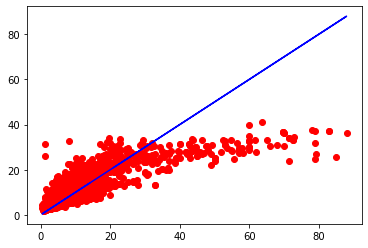

In [111]:
#training the data on hypertuned  XGBRegressor model

Best_mod.fit(x_train,y_train)
#Predicting the data
pred_train=Best_mod.predict(x_train)
pred=Best_mod.predict(x_test)

print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
print("\n")
print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
print("\n")
print("Error")
print("mean absolute error : ",mean_absolute_error(y_test,pred))
print("mean squared error : ",mean_squared_error(y_test,pred))
print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))

plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')

In [ ]:
Best_mod=RandomForestRegressor(n_estimators=300 , criterion='friedman_mse', max_depth= 7, min_samples_split= 3, 
                               max_features='log2',min_samples_leaf=1 )
Best_mod.fit(x_train,y_train)
pred=Best_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Saving the model:

In [112]:
# Saving the model using .pkl
import joblib
joblib.dump(etr,"Car_Price.pkl")

['Car_Price.pkl']

# Predictions:

In [114]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 4.23  ,  5.8   ,  4.0954, ..., 24.4062,  0.75  ,  3.4   ])

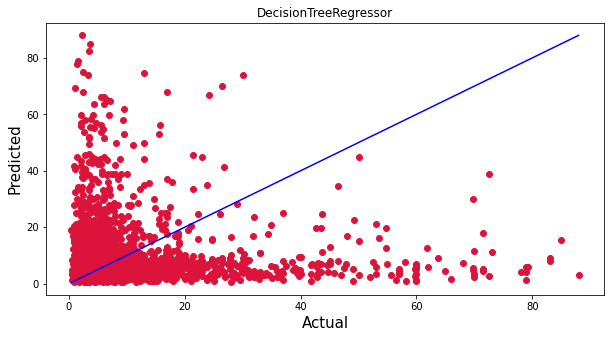

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

In [116]:
joblib.dump(etr,"Car_Price.obj")

['Car_Price.obj']

In [117]:
#Lets Check loading the file 

Car_Price_prediction=joblib.load("Car_Price.obj")

In [120]:
pred=etr.predict(x_test)
Conclusion=pd.DataFrame([Car_Price_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [121]:
Conclusion

0        1       2     3       4       5        6       7     \
Predicted  12.6768  11.1517  3.0839  1.63  2.1003  13.643  24.0135  9.0153   
Original   12.6768  11.1517  3.0839  1.63  2.1003  13.643  24.0135  9.0153   

             8       9       10      11      12      13      14      15    \
Predicted  2.6134  6.4172  1.1073  2.5995  4.7967  9.6244  6.5795  4.9305   
Original   2.6134  6.4172  1.1073  2.5995  4.7967  9.6244  6.5795  4.9305   

             16      17      18      19      20      21      22      23    \
Predicted  1.1896  5.0908  1.5411  7.1202  2.2863  6.2461  7.9914  6.5386   
Original   1.1896  5.0908  1.5411  7.1202  2.2863  6.2461  7.9914  6.5386   

             24      25      26      27       28      29     30       31    \
Predicted  5.5136  3.3402  8.2133  3.1778  10.1216  9.2515  2.199  14.9125   
Original   5.5136  3.3402  8.2133  3.1778  10.1216  9.2515  2.199  14.9125   

              32       33      34       35      36       37    38      39    \
Predicted  33.8673  53.7472  1.6227  19.3913  7.8829  12.0458  18.0  8.1268   
Original   33.8673  53.7472  1.6227  19.3913  7.8829  12.0458  18.0  8.1268   

             40      41       42      43      44       45      46       47    \
Predicted  6.2896  4.2859  0.90815  8.4929  3.1472  27.0389  20.986  11.7878   
Original   6.2896  4.2859  0.90815  8.4929  3.1472  27.0389  20.986  11.7878   

             48      49       50       51      52      53      54      55    \
Predicted  7.5541  5.4155  35.0653  15.6245  3.9338  8.1076  2.8275  1.7991   
Original   7.5541  5.4155  35.0653  15.6245  3.9338  8.1076  2.8275  1.7991   

             56      57      58     59      60    61      62      63    \
Predicted  3.4639  3.8565  2.8296  4.459  7.2643  3.85  4.9209  6.4342   
Original   3.4639  3.8565  2.8296  4.459  7.2643  3.85  4.9209  6.4342   

             64       65      66      67    68       69      70      71    \
Predicted  3.4807  15.9519  4.9378  3.9782  5.41  13.6794  2.3127  2.3387   
Original   3.4807  15.9519  4.9378  3.9782  5.41  13.6794  2.3127  2.3387   

             72    73      74       75      76       77       78       79    \
Predicted  4.9831   0.8  6.6106  12.7055  5.8422  18.4991  14.3283  11.9719   
Original   4.9831   0.8  6.6106  12.7055  5.8422  18.4991  14.3283  11.9719   

             80      81    82      83      84      85      86    87      88    \
Predicted  5.1789  3.5241   6.5  4.2666  6.9345  5.1163  9.2373   2.5  2.1232   
Original   5.1789  3.5241   6.5  4.2666  6.9345  5.1163  9.2373   2.5  2.1232   

             89      90      91    92      93      94       95       96    \
Predicted  2.5994  2.2731  6.2786  5.72  2.3151  4.0813  52.9049  13.4334   
Original   2.5994  2.2731  6.2786  5.72  2.3151  4.0813  52.9049  13.4334   

             97      98     99      100     101    102     103     104   \
Predicted  6.9188  5.0217  4.332  2.9804  6.4618  39.75  3.7514  4.0021   
Original   6.9188  5.0217  4.332  2.9804  6.4618  39.75  3.7514  4.0021   

             105     106     107   108     109     110     111      112   \
Predicted  3.1284  33.457  10.162  30.0  8.0946  2.7103  5.6372  15.1312   
Original   3.1284  33.457  10.162  30.0  8.0946  2.7103  5.6372  15.1312   

             113      114     115     116   117     118      119     120   \
Predicted  1.3064  15.3558  6.5483  2.6781  6.71  4.4687  32.1775  10.677   
Original   1.3064  15.3558  6.5483  2.6781  6.71  4.4687  32.1775  10.677   

             121     122      123    124     125     126   127     128   \
Predicted  3.3765  4.3447  34.1189  7.462  7.1438  9.7126  4.75  1.1616   
Original   3.3765  4.3447  34.1189  7.462  7.1438  9.7126  4.75  1.1616   

             129   130     131     132     133   134     135   136   137   \
Predicted  1.4528   4.5  7.8435  7.3012  5.3929  37.0  1.4768  25.0   5.5   
Original   1.4528   4.5  7.8435  7.3012  5.3929  37.0  1.4768  25.0   5.5   

             138    139     140      141      142

In [ ]:
Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

Thank You:)